# Brooke Johnson
## Homework 3
MSDS 598 Spring 2022

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [115]:
df = pd.read_csv('heart.csv')

### 1. What is the percentage of patients with heart disease? Would you consider this a balanced or imbalanced dataset? 

In [116]:
perc_hd = df.target.value_counts() / len(df)
perc_hd

1    0.544554
0    0.455446
Name: target, dtype: float64

#### Answer:

The dataset is more balanced than unbalanced. Of the two categories (has or doesn't have heart disease) they are both within 5 percentage points from a perfect split. However, in total there is a 9 percentage point difference between them which isn't negligible. 

### 2. Suppose we want to use variables age and sex to predict the presence of heart disease. 
#### (a). Use logistic regression to create a model predicting target from age and sex. Report the Accuracy.

In [117]:
model = logit(formula = 'target ~ age + sex', data=df)
res = model.fit()

x = df[['age', 'sex']]
y = df['target']

y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

acc = metrics.accuracy_score(y, y_pred)
print(f'The Accuracy of the model on the validation set is {100*acc}%')

Optimization terminated successfully.
         Current function value: 0.611509
         Iterations 5
The Accuracy of the model on the validation set is 64.68646864686468%


#### (b). If we had a model that predicted heart disease for every patient, what would the accuracy be?

In [118]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [119]:
model = logit(formula = 'target ~ age + sex + cp + trestbps + chol + restecg + thalach + exang + oldpeak + slope + ca + thal', data=df)
res = model.fit()

x = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

acc = metrics.accuracy_score(y, y_pred)
print(f'The Accuracy of the model is {100*acc}%')

Optimization terminated successfully.
         Current function value: 0.348911
         Iterations 7
The Accuracy of the model is 84.81848184818482%


### 3. Perform a trial-validation split (use 50 patients in your validation set). What is the accuracy of your model (same variables as the previous question, created on the training set) on the validation set?

In [121]:
# set 50 patients aside for validation set, calculate the percentage to use:
obs = len(df)

test_perc = (50/len(df))
test_perc

0.16501650165016502

In [122]:
# take random 83% of the patients for testing
train, val = train_test_split(df, test_size=0.17)

In [123]:
model = logit(formula = 'target ~ age + sex', data=train)
res = model.fit()

x = val[['age', 'sex']]
y = val['restecg']

y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

acc = metrics.accuracy_score(y, y_pred)

print(f'The Accuracy of the model on the validation set is {100*acc}%')

Optimization terminated successfully.
         Current function value: 0.620675
         Iterations 5
The Accuracy of the model on the validation set is 71.15384615384616%


### 4. Pick another variable. Use this validation set and the accuracy metric to decide if this variable improves the model or not. 

In [124]:
model = logit(formula = 'target ~ age + sex + restecg', data=train)
res = model.fit()

x = val[['age', 'sex', 'restecg']]
y = val['restecg']

y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

acc = metrics.accuracy_score(y, y_pred)

print(f'The Accuracy of the model on the validation set is {100*acc}%')

Optimization terminated successfully.
         Current function value: 0.619168
         Iterations 5
The Accuracy of the model on the validation set is 71.15384615384616%


### 5. Pick your favorite set of independent variables and run a logistic regression using train-validation set from above. 
#### (a). Produce the Confusion Matrix.

In [125]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
model = ols(formula = 'restecg ~ age + sex + thal', data=train)
res = model.fit()

x = val[['age', 'sex', 'thal']]
y = val['restecg']

y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

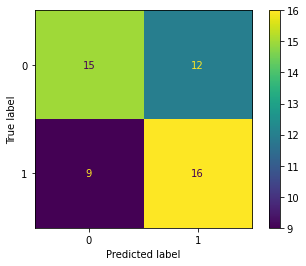

In [127]:
# build the confusion matrix
cm = metrics.confusion_matrix(y, y_pred)
# display it nicely
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### (b). Report the Accuracy, Precision, Recall, and AUC.

In [128]:
acc = metrics.accuracy_score(y, y_pred)
recall = metrics.recall_score(y, y_pred)
prec = metrics.precision_score(y, y_pred)
auc = metrics.roc_auc_score(y, y_pred_prob)

print(f'The Accuracy of the model on the validation set is {acc}')
print(f'The Recall of the model on the validation set is {recall}')
print(f'The Precision of the model on the validation set is {prec}')
print(f'The AUC of this model is {auc}')

The Accuracy of the model on the validation set is 0.5961538461538461
The Recall of the model on the validation set is 0.64
The Precision of the model on the validation set is 0.5714285714285714
The AUC of this model is 0.617037037037037


#### (c). Consider the task of predicting whether a person has heart disease or not, which metric in part (b) is the most important?